In [7]:
pip install opencv-python

You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tqdm

     |████████████████████████████████| 78 kB 5.1 MB/s             
You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

     |████████████████████████████████| 7.2 MB 5.5 MB/s            
     |████████████████████████████████| 63 kB 8.6 MB/s             
     |████████████████████████████████| 2.8 MB 13.1 MB/s            
     |████████████████████████████████| 930 kB 8.6 MB/s            
You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

img_name: image00.png
img_name: image01.png
img_name: image03.png
img_name: image02.png
img_name: image06.png
img_name: image12.png
img_name: image13.png
img_name: image07.png
img_name: image11.png
img_name: image05.png
img_name: image04.png
img_name: image10.png
img_name: image09.png
img_name: image08.png
len(lines_filtered): 24 sumx: 8108.058678429695
len(lines_filtered): 19 sumx: 6275.926003172236
len(lines_filtered): 26 sumx: 9109.50500677489
len(lines_filtered): 22 sumx: 6776.111246764741
len(lines_filtered): 26 sumx: 7415.88091653038
len(lines_filtered): 26 sumx: 7643.262614966175
len(lines_filtered): 29 sumx: 8562.759556484893
len(lines_filtered): 21 sumx: 6422.579031012593
len(lines_filtered): 22 sumx: 7691.156956767232
len(lines_filtered): 23 sumx: 8178.55862350562
len(lines_filtered): 55 sumx: 16543.63630811596
len(lines_filtered): 26 sumx: 8542.193491313032
len(lines_filtered): 25 sumx: 8808.931523210542
len(lines_filtered): 26 sumx: 8576.859642535106


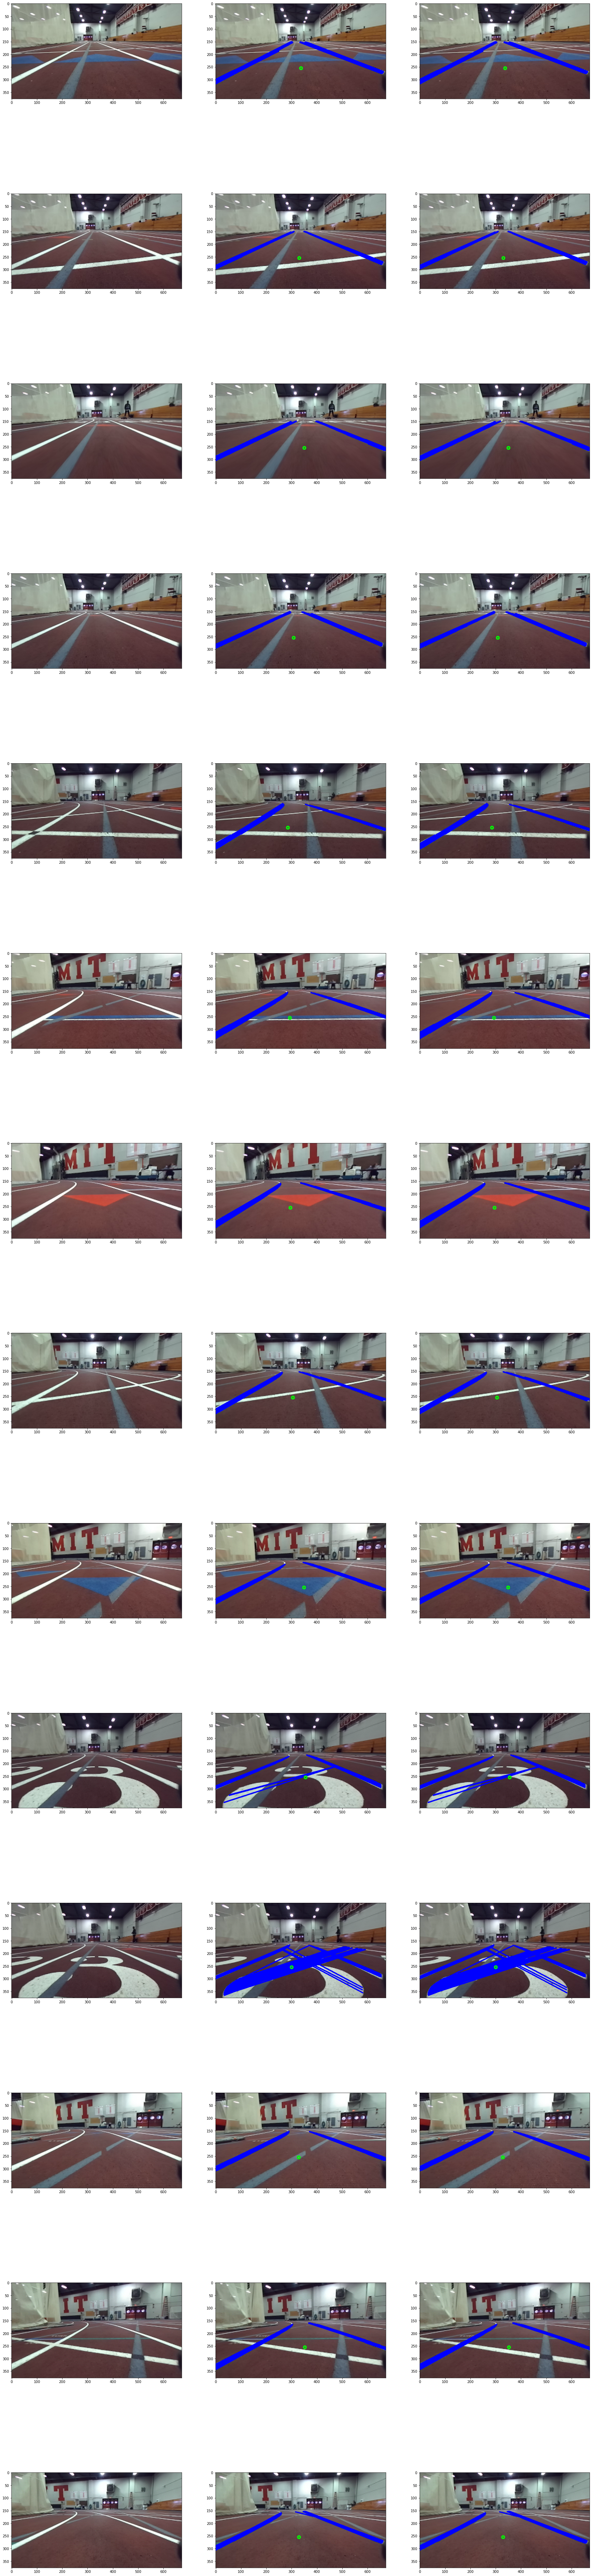

In [171]:
imgs_dir = "../../track_run/" #"../media/TrackPics/"
rgb_imgs = []
# imgs = [cv2.imread(os.path.join(imgs_dir, img_name)) for img_name in os.listdir(imgs_dir)]
for img_name in os.listdir(imgs_dir):
    print("img_name:", img_name)
    image = cv2.imread(os.path.join(imgs_dir, img_name))

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rgb_imgs.append(image) 

num_pics = len(rgb_imgs)


# _, axs = plt.subplots(num_pics, 2, figsize=(20, num_pics*10))

_, axs = plt.subplots(num_pics, 3, figsize=(30, num_pics*10))


# axs.shape
# axs = axs.flatten()

for i in range(num_pics):
    axs[i][0].imshow(rgb_imgs[i])
    new_image, test_image = detect_lane_img(rgb_imgs[i])
    axs[i][1].imshow(new_image)
    
    axs[i][2].imshow(test_image)

0

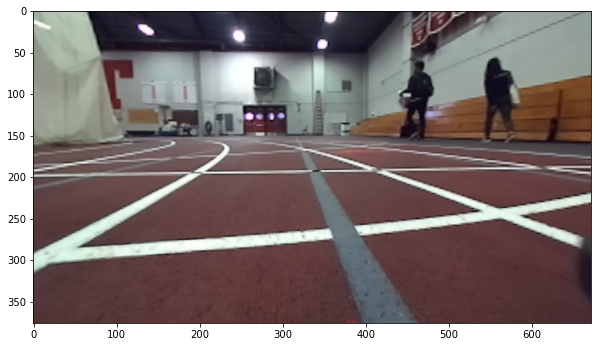

In [45]:
test_image_path="../media/TrackPics/4_whitelines.png"
image = cv2.imread(test_image_path)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
print(image.shape)

(376, 672, 3)


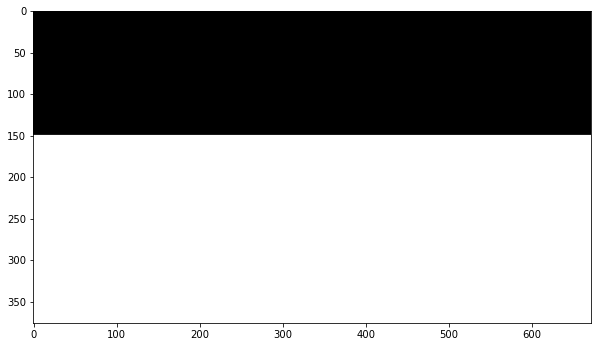

In [9]:
# create a zero array
stencil = np.zeros_like(image[:,:,0])
# specify coordinates of the polygon
#polygon = np.array([[-150,376], [280,160], [400,160], [1100,376]])
polygon = np.array([[0,376], [0,150], [672,150], [672,376]])
# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

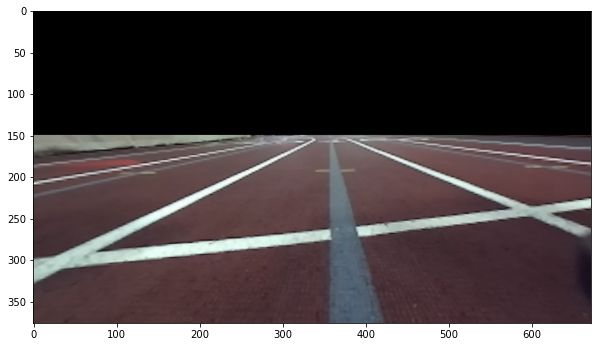

In [20]:
# apply polygon as a mask on the frame
# img = cv2.bitwise_and(image[:,:,0], image[:,:,0], mask=stencil)
cropped_rgb_img = cv2.bitwise_and(image, image, mask=stencil)

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img) #, cmap= "gray")
plt.show()

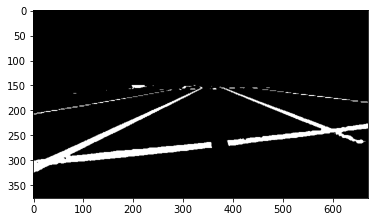

In [30]:
# apply image thresholding
thresh, ret = cv2.threshold(cv2.cvtColor(cropped_rgb_img, cv2.COLOR_RGB2GRAY), 165, 200, cv2.THRESH_BINARY)

# # plot image
# plt.figure(figsize=(10,10))
plt.imshow(ret, cmap= "gray")
plt.show()

In [33]:
rgb_img = image

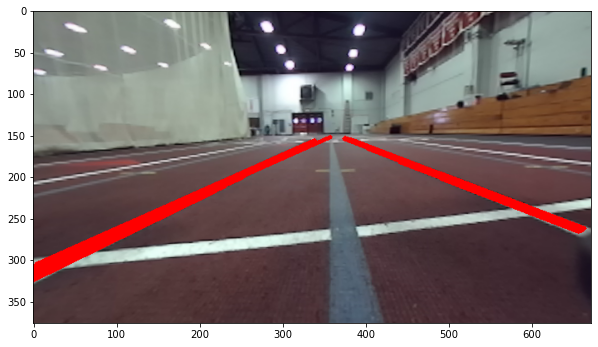

In [36]:
lines = cv2.HoughLinesP(ret, 1, np.pi/180, 60, maxLineGap=200)
lines_filtered = []
# create a copy of the original frame
# dmy = image[:,:,0].copy()
rbg_img_copy = rgb_img.copy()
# draw Hough lines
for line in lines:
  x1, y1, x2, y2 = line[0]
  
  m = (y2-y1)/(x2-x1)
  if (abs(m) > 0.3):
      lines_filtered.append(line)
      cv2.line(rbg_img_copy, (x1, y1), (x2, y2), (255, 0, 0), 3)

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(rbg_img_copy)#cv2.cvtColor(dmy, cv2.COLOR_BGR2RGB))
plt.show()

(326, 255)


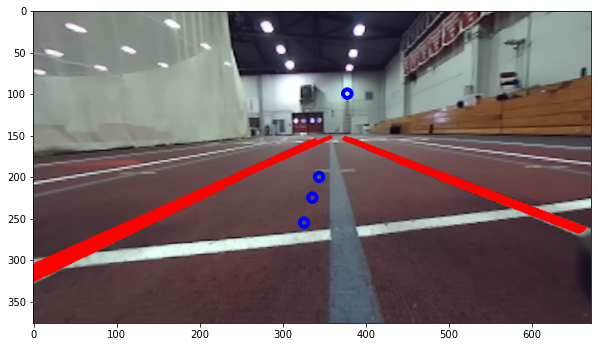

In [170]:
def detect_lane_img(rgb_img):
    
    # create a zero array
    stencil = np.zeros_like(image[:,:,0])
    # specify coordinates of the polygon
    #polygon = np.array([[-150,376], [280,160], [400,160], [1100,376]])
    polygon = np.array([[0,376], [0,150], [672,150], [672,376]])
    # fill polygon with ones
    cv2.fillConvexPoly(stencil, polygon, 1)
    cropped_rgb_img = cv2.bitwise_and(rgb_img, rgb_img, mask=stencil)

    
    # apply image thresholding
    thresh, ret = cv2.threshold(cv2.cvtColor(cropped_rgb_img, cv2.COLOR_RGB2GRAY), 165, 200, cv2.THRESH_BINARY)


    lines = cv2.HoughLinesP(ret, 1, np.pi/180, 60, maxLineGap=200)
    lines_filtered = []
    # create a copy of the original frame
    # dmy = image[:,:,0].copy()
    rbg_img_copy = rgb_img.copy()
    # draw Hough lines
    for line in lines:
      x1, y1, x2, y2 = line[0]
      m = (y2-y1)/(x2-x1)
      if (abs(m) > 0.25):
          lines_filtered.append(line)
          cv2.line(rbg_img_copy, (x1, y1), (x2, y2), (0, 0, 255), 3)

#     # plot frame
#     plt.figure(figsize=(10,10))
#     plt.imshow(rbg_img_copy)#cv2.cvtColor(dmy, cv2.COLOR_BGR2RGB))
#     plt.show()

    ###TEST###
    #no range
    y_lookahead = 255
    sumx = 0
    for line in lines_filtered:
        x1, y1, x2, y2 = line[0]
        m = (y2-y1)/(x2-x1)
        b = y2-(m*x2)
        x_lookahead = (y_lookahead-b)/m
        sumx += x_lookahead
    
    avgx = sumx/(len(lines_filtered))
    test_image = rbg_img_copy.copy()
    cv2.circle(test_image, (int(avgx), y_lookahead), 5, (0, 255, 0), 3)
    #########
    

    
    y_lookahead_min, y_lookahead_max = 255, 256
    y_lookahead_range = range(y_lookahead_min, y_lookahead_max)
    sumx = 0;

    for y_lookahead in y_lookahead_range:
        for line in lines_filtered:
            x1, y1, x2, y2 = line[0]
            m = (y2-y1)/(x2-x1)
            b = y2-(m*x2)
            x_lookahead = (y_lookahead-b)/m
            sumx += x_lookahead
    
    avgx = sumx/(len(lines_filtered) * (y_lookahead_max-y_lookahead_min))
    print("len(lines_filtered):", len(lines_filtered), "sumx:", sumx)
    avgy = int((y_lookahead_min+y_lookahead_max) / 2.0)
    avgy = max(avgy, 1)
    cv2.circle(rbg_img_copy, (int(avgx), avgy), 5, (0, 255, 0), 3)
    
    
    
    
#     print((int(avgx), int((y_lookahead_min+y_lookahead_max) /2)))
#     plt.figure(figsize=(10,10))
#     plt.imshow(test_image) #cv2.cvtColor(dmy, cv2.COLOR_BGR2RGB))
#     plt.show()
    
    return rbg_img_copy, test_image

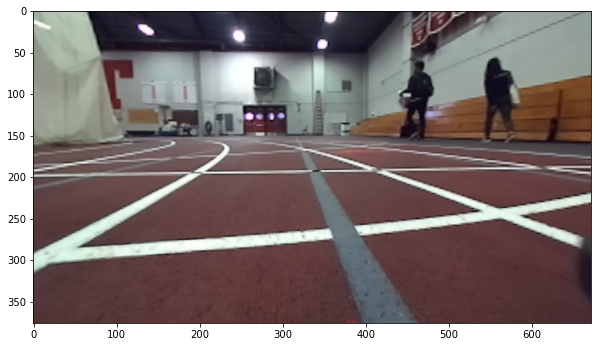

In [140]:
test_image_path="../media/TrackPics/4_whitelines.png"
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(test_image)
plt.show()

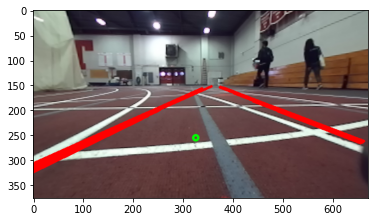

(array([[[157, 169, 153],
         [156, 168, 152],
         [155, 167, 151],
         ...,
         [131, 144, 138],
         [137, 150, 144],
         [142, 155, 149]],
 
        [[158, 170, 154],
         [157, 169, 153],
         [155, 168, 152],
         ...,
         [137, 150, 144],
         [141, 154, 148],
         [144, 157, 151]],
 
        [[160, 172, 156],
         [158, 170, 154],
         [156, 170, 153],
         ...,
         [141, 154, 148],
         [143, 156, 150],
         [144, 157, 151]],
 
        ...,
 
        [[ 79,  53,  53],
         [ 80,  53,  53],
         [ 81,  53,  54],
         ...,
         [ 69,  44,  51],
         [ 69,  44,  51],
         [ 69,  44,  51]],
 
        [[ 79,  53,  53],
         [ 80,  52,  53],
         [ 81,  53,  54],
         ...,
         [ 70,  45,  51],
         [ 69,  44,  51],
         [ 69,  44,  51]],
 
        [[ 79,  52,  53],
         [ 79,  51,  52],
         [ 79,  51,  52],
         ...,
         [ 70,  45,  51],
  

In [122]:
detect_lane_img(test_image)

In [84]:
y_lookahead_range = range(150,300)
sum(y_lookahead_range)/2

16837.5

In [3]:
def get_lane_point(rgb_img, display=False):
    
    COLOR_POINT = (0, 255, 0)
    COLOR_LINES = (0, 0, 255)
    
    ## THRESHOLDING
    # create a zero array
    stencil = np.zeros_like(rgb_img[:,:,0])
    # specify coordinates of the polygon
    #polygon = np.array([[-150,376], [280,160], [400,160], [1100,376]])
    polygon = np.array([[0,376], [0,150], [672,150], [672,376]])
    # fill polygon with ones
    cv2.fillConvexPoly(stencil, polygon, 1)
    cropped_rgb_img = cv2.bitwise_and(rgb_img, rgb_img, mask=stencil)
    # apply image thresholding
    thresh, ret = cv2.threshold(cv2.cvtColor(cropped_rgb_img, cv2.COLOR_RGB2GRAY), 165, 200, cv2.THRESH_BINARY)

    ## HOUGH TRANSFORM TO GET LINES
    lines = cv2.HoughLinesP(ret, 1, np.pi/180, 60, maxLineGap=200)
    lines_filtered = []
    # create a copy of the original frame
    # dmy = image[:,:,0].copy()
    rbg_img_copy = rgb_img.copy()
    # draw Hough lines
    for line in lines:
      x1, y1, x2, y2 = line[0]
      m = (y2-y1)/(x2-x1)
      if (abs(m) > 0.25):
          lines_filtered.append(line)
          cv2.line(rbg_img_copy, (x1, y1), (x2, y2), COLOR_LINES, 3)

#     # PREVIOUS CODE
#     y_lookahead = 255
#     sumx = 0
#     for line in lines_filtered:
#         x1, y1, x2, y2 = line[0]
#         m = (y2-y1)/(x2-x1)
#         b = y2-(m*x2)
#         x_lookahead = (y_lookahead-b)/m
#         sumx += x_lookahead
    
#     avgx = sumx/(len(lines_filtered))
#     test_image = rbg_img_copy.copy()
#     cv2.circle(test_image, (int(avgx), y_lookahead), 5, (0, 0, 255), 3)
#     #########
    

    ## GET LANE POINT WITH LOOKAHEAD RANGE
    y_lookahead_min, y_lookahead_max = 255, 256
    y_lookahead_range = range(y_lookahead_min, y_lookahead_max)
    sumx = 0;
    for y_lookahead in y_lookahead_range:
        for line in lines_filtered:
            x1, y1, x2, y2 = line[0]
            m = (y2-y1)/(x2-x1)
            b = y2-(m*x2)
            x_lookahead = (y_lookahead-b)/m
            sumx += x_lookahead
    
    avgx = int(sumx/(len(lines_filtered) * (y_lookahead_max-y_lookahead_min)))

    avgy = int((y_lookahead_min+y_lookahead_max) / 2.0)
    
    cv2.circle(rbg_img_copy, (avgx, avgy), 5, COLOR_POINT, 3)
    
    if display==True:
        plt.imshow(rbg_img_copy)
        plt.show()
    
    return (avgx, avgy)